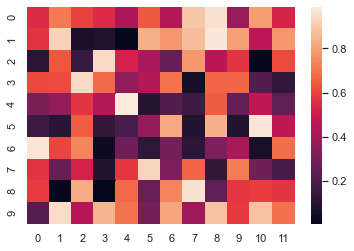

In [3]:
import numpy as np; np.random.seed(0)
import pandas as pd
import seaborn as sns; sns.set_theme()
from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
from sklearn.metrics import matthews_corrcoef
%matplotlib inline 
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data)

In [4]:
import os
path = os.getcwd()

In [5]:
df = pd.read_csv('./US/nmurx_us_19Q1.csv')

In [6]:
contigency = pd.crosstab(index=df['DEM_RACE_WHITE','DEM_RACE_B'],columns = df['CAN_USE'],normalize = 'index')
plt.figure(figsize=(12,15))
sns.heatmap(contigency, annot=True, cmap="YlGnBu")
c, p, dof, expected = chi2_contingency(contigency)
p

KeyError: ('DEM_RACE_WHITE', 'DEM_RACE_B')

In [7]:
contigency

NameError: name 'contigency' is not defined

In [13]:
def label_frequency(val):
    if val == 1 or val ==  2:
        return 1
    else:
        return 0

In [14]:
#df['COKE_RECENT'] = 
df['COKE_ADD']=df['COKE_REC'].apply(label_frequency)
df['CRACK_ADD']=df['CRACK_REC'].apply(label_frequency)
df['CAN_ADD']=df['CAN_REC'].apply(label_frequency)

In [8]:
lst= ['SED_NMU','STIM_NMU','GABA_NMU','DAST_CAT']

In [9]:
drug_df = df[lst]
drug_df
drug_col = drug_df.columns
chisqmatrix = pd.DataFrame(drug_df, columns = drug_col, index = drug_col)

<AxesSubplot:>

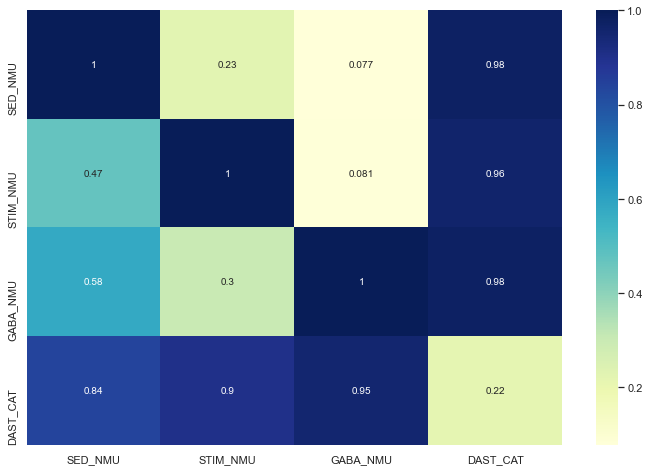

In [12]:
'''outercount = 0
innercount = 0
'''
for row in drug_col:
    for col in drug_col:
        contingency = pd.crosstab(index=df[row],columns = df[col], normalize = 'index')
        c, p, dof, expected = chi2_contingency(contingency)
        chisqmatrix.at[row, col]=round(p,5)
        chisqmatrix.at[row, col] = round(p,5)
'''        countexpected = expected[expected<5].size
        print(countexpected)
        perexpected = ((expected.size-countexpected)/expected.size)*100
        if perexpected<20:
            chisqmatrix.iloc[outercount,innercount]=2
            
            if row == col :
                chisqmatrix.iloc[outercount,innercount] =0.00
                innercount+=1
                outercount+=1
                innercount =0
        
print(chisqmatrix)
'''

plt.figure(figsize=(12,8))

sns.heatmap(chisqmatrix, annot=True, cmap="YlGnBu")

In [21]:
def gen_heatmap(df, lst):
    drug_df = df[lst]
    drug_df
    drug_col = drug_df.columns
    chisqmatrix = pd.DataFrame(drug_df, columns = drug_col, index = drug_col)
    for row in drug_col:
        for col in drug_col:
            contingency = pd.crosstab(index=df[row],columns = df[col], normalize = 'index')
            c, p, dof, expected = chi2_contingency(contingency)
            chisqmatrix.at[row, col]=round(p,5)
    plt.figure(figsize=(12,8))
    sns.heatmap(chisqmatrix, annot=True, cmap="YlGnBu")

In [31]:
lst1 = ['DEM_MARITAL','DEM_EMPLOY','DAST_CAT']

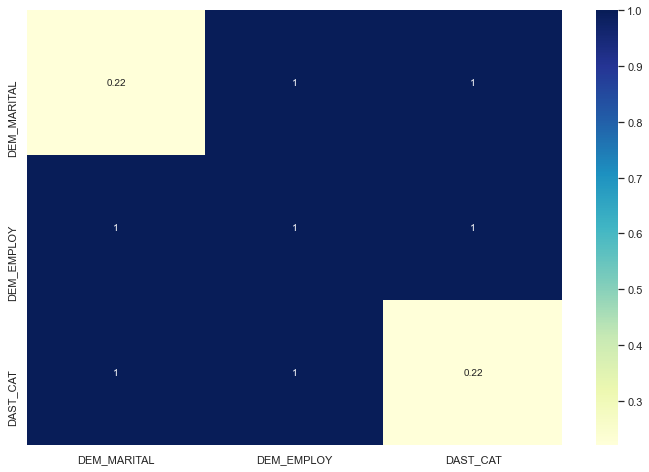

In [32]:
gen_heatmap(df, lst1)